In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('preprocessed_data.csv')

## Model

In [12]:
X = df[['valence',
        'backing_dancers',
        'eng_lan',
       'Pop', 'Traditional', 'Dance', 'Ballad']]

y = df['is_final']

X = sm.add_constant(X)
best_of_the_best_model = sm.Logit(y, X)
best_of_the_best_model = best_of_the_best_model.fit()

print(best_of_the_best_model.summary())

Optimization terminated successfully.
         Current function value: 0.665933
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               is_final   No. Observations:                  565
Model:                          Logit   Df Residuals:                      557
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                 0.03915
Time:                        13:22:48   Log-Likelihood:                -376.25
converged:                       True   LL-Null:                       -391.58
Covariance Type:            nonrobust   LLR p-value:                 7.168e-05
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1974      0.370     -0.533      0.594      -0.923       0.528
valence       

## Goodness-of-fit

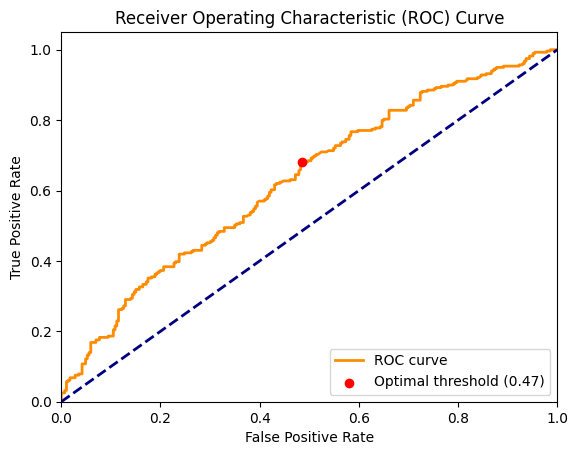

Optimal Threshold: 0.47253453665712813
New Confusion Matrix:
[[147 139]
 [ 89 190]]
Accuracy: 0.5964601769911504
Sensitivity: 0.6810035842293907
Specificity: 0.513986013986014


In [14]:
X_test = sm.add_constant(df[['valence',
        'backing_dancers',
        'eng_lan',
       'Pop', 'Traditional', 'Dance', 'Ballad']])
y_pred_prob = best_of_the_best_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal threshold ({optimal_threshold:.2f})', zorder=5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

y_pred_new = (y_pred_prob >= optimal_threshold).astype(int)
conf_matrix_new = confusion_matrix(y, y_pred_new)

tn_new, fp_new, fn_new, tp_new = conf_matrix_new.ravel()
accuracy = (tp_new + tn_new) / (tp_new + tn_new + fp_new + fn_new)
sensitivity = tp_new / (tp_new + fn_new)
specificity = tn_new / (tn_new + fp_new)

print("Optimal Threshold:", optimal_threshold)
print("New Confusion Matrix:")
print(conf_matrix_new)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
